# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html>

**Student name**: Nicola Zomer <br>
**ID Number**: 2058479

### Assignment

1) Load the provided .csv file with the used car data

2) Use a linear regression to estimate the car prices from the year, kilometers or engine power. You can make a simple 1D regression from each one of the parameters independently (as an optional task you can also try a 2D or 3D regression combining multiple cues)

3) Firstly perform the estimation using the scipy linregress function (or alternatively you can use the sklearn.linear_model.LinearRegression class).
NB: check the documentation of the two methods!! In particular be aware of the number of outputs (in case use "_" to avoid the return of a specific output).

4) Have a look at the correlation coefficient to see which of the 3 features works better

5) Then implement the least square algorithm: you should get exactly the same solution of linregress !

6) Plot the data and the lines representing the output of the linregress and least square algorithms


In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model

In [89]:
# Load the provided data file with the used car data (you can also have a look at it with any text editor)

filename = "data/km_year_power_price.csv"
lines = csv.reader(open(filename, newline=''), delimiter=',')

dataset = list(lines)
del dataset[0]

for i in range(len(dataset)):
    dataset[i] = [float(x) for x in dataset[i]]
    
dataset = np.array(dataset)

print('Dataset:\n', '[Km', ' '*9, 'Year', ' '*9, 'Power', ' '*9, 'Price]\n', dataset)

data_km = dataset[:, 0:4:3]
data_year = dataset[:, 1:4:2]
data_power = dataset[:, 2:4]

datadic = {'km': data_km, 'year': data_year, 'power': data_power}


Dataset:
 [Km           Year           Power           Price]
 [[1.250000e+05 2.001000e+03 4.000000e+01 1.371110e+03]
 [1.500000e+05 2.001000e+03 4.000000e+01 1.298700e+03]
 [5.000000e+03 2.001000e+03 6.000000e+01 1.232430e+03]
 ...
 [2.000000e+04 2.015000e+03 2.600000e+02 4.949238e+04]
 [1.000000e+04 2.015000e+03 3.000000e+02 3.854269e+04]
 [2.000000e+04 2.015000e+03 3.000000e+02 3.968332e+04]]


Use linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




In [90]:
# linear regression with linregress

r_km = stats.linregress(x=data_km, y=None)
r_year = stats.linregress(x=data_year, y=None)
r_power = stats.linregress(x=data_power, y=None)

print('Results km-price: ', r_km)
print('Results year-price: ', r_year)
print('Results power-price: ', r_power)

Results km-price:  LinregressResult(slope=-0.054251513309725635, intercept=16692.345302519738, rvalue=-0.25728674299884974, pvalue=4.6897144107235236e-21, stderr=0.0056622275650525895, intercept_stderr=512.1908433023634)
Results year-price:  LinregressResult(slope=1509.0938253352238, intercept=-3018309.4849569635, rvalue=0.6767043169095446, pvalue=2.07223115991105e-174, stderr=45.625811824073196, intercept_stderr=91628.09494333212)
Results power-price:  LinregressResult(slope=90.33080718820231, intercept=-1303.912698987995, rvalue=0.7085500315263968, pvalue=2.670876398432412e-198, stderr=2.4999213289302586, intercept_stderr=413.9119040279444)


Slope: 1510.3531533552352
Intercept: -3020830.4889118313
Mean squared error: 7154.212077977723
Coefficient of determination: 0.3314996098407922


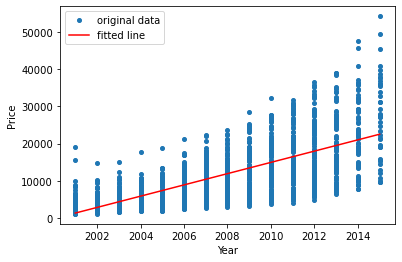

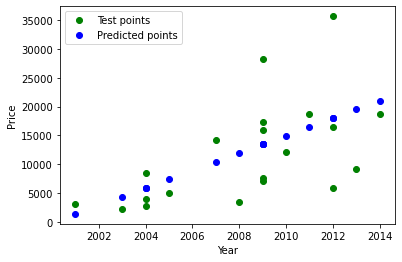

In [101]:

# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)
# Recall that in Python a mx1 matrix is different from a 1D array -> need to reshape

# Split the data/targets randomly into training/testing sets
test_size = 20
number_data = data_year.shape[0]
random_indices = np.random.choice(number_data, size = test_size, replace=False)

data_year_x_test = data_year[random_indices, 0]
data_year_y_test = data_year[random_indices, 1]

mask = np.ones(number_data, dtype = 'bool')
mask[random_indices] = False
data_year_x_train = data_year[mask, 0]
data_year_y_train = data_year[mask, 1]

# Reshape
# Not needed if you extract the column in this way: data_year_x_test = data_year[random_indices, 0:1]
data_year_x_train = data_year_x_train[:, np.newaxis]
data_year_x_test = data_year_x_test[:, np.newaxis]

# # OLD SPLITTING (NOT RANDOM)
# data_year_x_train = data_year[:, 0][:-20]
# data_year_x_test = data_year[:, 0][-20:]
# data_year_x_train = data_year_x_train[:, np.newaxis]
# data_year_x_test = data_year_x_test[:, np.newaxis]
# # Split the targets into training/testing sets
# data_year_y_train = data_year[:, 1][:-20]
# data_year_y_test = data_year[:, 1][-20:]

# Use the model
model = linear_model.LinearRegression()
results = model.fit(data_year_x_train, data_year_y_train)

# Coefficients
print('Slope:', results.coef_[0])
print('Intercept:', results.intercept_)

# Make predictions
data_year_pred = results.predict(data_year_x_test)
print('Mean squared error:', sl.metrics.mean_squared_error(data_year_y_test, data_year_pred, squared = False))

# rvalue
print("Coefficient of determination:", results.score(data_year_x_test, data_year_y_test))

# plot results
plt.plot (data_year[:, 0], data_year[:, 1], 'o', label= 'original data', markersize = 4)
plt.plot (data_year[:, 0], results.intercept_ + results.coef_*data_year[:, 0], 'r', label = 'fitted line')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

# Prediction vs test 
plt.plot(data_year_x_test, data_year_y_test, 'o', color = 'green', label = 'Test points')
plt.plot(data_year_x_test, data_year_pred, 'o', color = 'blue', label = 'Predicted points')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

In [92]:
# (Optional) perform linear regression with a manually implemented least squares (estimate price from year)
# You should get exactly the same solution of linregress !
# You can do it later after the lectures on linear models

def leastSquares(x, y=None):
    # if y is given, S=x, otherwise S is the training set
    
    if y is None:
        y = x[:, -1]
        x = x[:, :-1]
        
    # add 1 in front pf xi for all i
    x = np.insert(x, 0, [1], axis = 1)
        
    xT = np.transpose(x)
    b = np.dot(xT, y)
    A = np.dot(xT, x)
    
    w = np.dot(np.linalg.inv(A), b)
    return {'Slope': w[1:], 'Intercept': w[0]}  


# Let's try it with our data:
test = leastSquares(data_km)
print('Result from km:')
print('Slope:', test['Slope'], 'Intercept:', test['Intercept'])

test = leastSquares(data_year)
print('Result from year:')
print('Slope:', test['Slope'], 'Intercept:', test['Intercept'])

test = leastSquares(data_power)
print('Result from power:')
print('Slope:', test['Slope'], 'Intercept:', test['Intercept'])
      
    

Result from km:
Slope: [-0.05425151] Intercept: 16692.34530251973
Result from year:
Slope: [1509.09382537] Intercept: -3018309.485031128
Result from power:
Slope: [90.33080719] Intercept: -1303.9126989879878


In [93]:
# Plot the data and the lines representing the output of the linregress and least square algorithms

def plotfunc(x, y, result, feature): 
    plt.plot (x, y, 'o', label= 'original data', markersize = 4)
    plt.plot (x, result.intercept + result.slope*x, 'r', label = 'fitted line')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.legend()
    plt.show()
        
plotfunc(data_km[:, 0], data_km[:, 1], r_km, 'Km')
plotfunc(data_year[:, 0], data_year[:, 1], r_year, 'Year')
plotfunc(data_power[:, 0], data_power[:, 1], r_power, 'Power')

<IPython.core.display.Javascript object>

In [94]:
# Have a look at the correlation coefficients to see which of the 3 features works better

correlations = np.array([r_km.rvalue, r_year.rvalue, r_power.rvalue])
best_corr_index = np.argmax(correlations)

if best_corr_index == 0:
    print('Best correlation: km, rvalue = ', correlations[0])
elif best_corr_index == 1:
    print('Best correlation: year, rvalue = ', correlations[1])
elif best_corr_index == 2:
    print('Best correlation: power, rvalue = ', correlations[2])
    

Best correlation: power, rvalue =  0.7085500315263968


Slope: [1329.84393178   80.771877  ]
Intercept: -2670506.1391587686
Mean squared error: 3022.7694584965584
Coefficient of determination: 0.7472179617051524


Text(0.5, 0, 'Price')

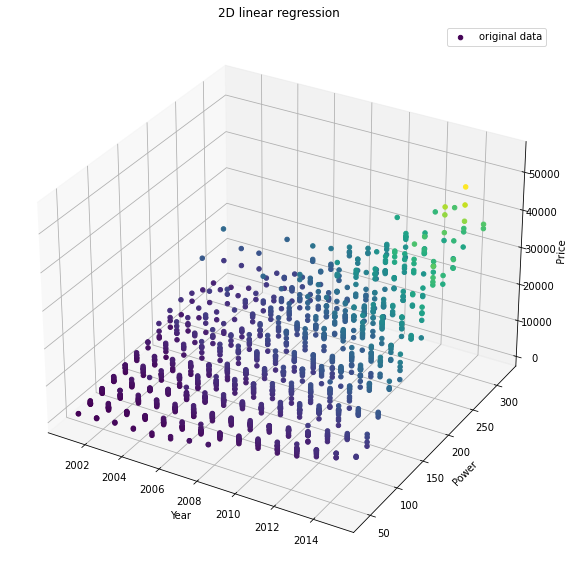

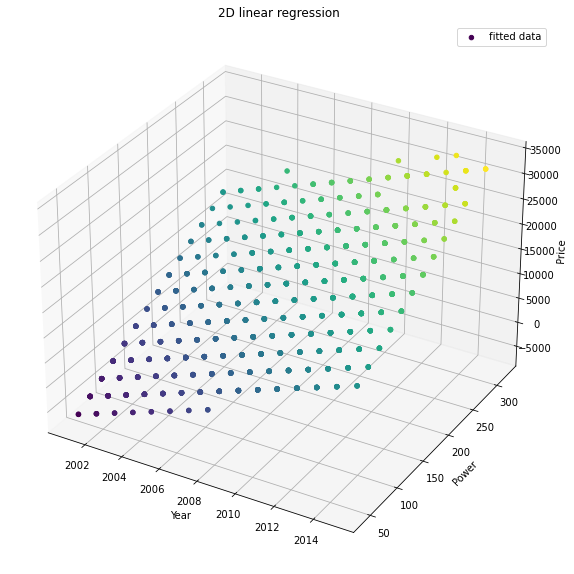

In [102]:
# (Optional) 2D linear regression with linear model (estimate price from year and power)

data_yp = dataset[:, 1:]

# Split the data/targets randomly into training/testing sets
test_size = 20
number_data = dataset.shape[0]
random_indices = np.random.choice(number_data, size = test_size, replace=False)

data_yp_x_test = data_yp[random_indices, 0:-1]
data_yp_y_test = data_yp[random_indices, -1]

mask = np.ones(number_data, dtype = 'bool')
mask[random_indices] = False
data_yp_x_train = data_yp[mask, 0:-1]
data_yp_y_train = data_yp[mask, -1]

# Use the model 
model = linear_model.LinearRegression()
results = model.fit(data_yp_x_train, data_yp_y_train)

# Coefficients
print('Slope:', results.coef_)
print('Intercept:', results.intercept_)

# Make predictions
data_yp_pred = results.predict(data_yp_x_test)
print('Mean squared error:', sl.metrics.mean_squared_error(data_yp_y_test, data_yp_pred, squared = False))

# rvalue
print("Coefficient of determination:", results.score(data_yp_x_test, data_yp_y_test))

# plot data
fig1 = plt.figure(figsize=(10,10))
ax = plt.axes(projection = '3d')
ax.scatter(data_yp[:, 0], data_yp[:, 1], data_yp[:, 2], label = 'original data', c=data_yp[:, 2], s=20, depthshade = False)
ax.set_title('2D linear regression')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Power')
ax.set_zlabel('Price')

def plane(x, y):
    return results.coef_[0]*x + results.coef_[1]*y + results.intercept_*np.ones((1, len(x)))

x = data_yp[:, 0]
y = data_yp[:, 1]
z = plane(x, y)

fig2 = plt.figure(figsize=(10,10))
ax = plt.axes(projection = '3d')
ax.scatter(x, y, z, label = 'fitted data', c=z, s=20, depthshade = False)
ax.set_title('2D linear regression')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Power')
ax.set_zlabel('Price')

# fig3 =plt.figure(figsize=(10,10))
# ax = fig3.add_subplot(111, projection='3d')
# ax.plot_surface(x, y, z)
# plt.show()




